# Support Vector Classifier

_Gareth, J., Daniela, W., Trevor, H., & Robert, T. (2013). An introduction to statistical learning: with applications in R. Spinger._

SVM es un modelo que representa a los puntos de muestra en el espacio, separando. las clases a 2 (clasificación binaria) espacios lo más amplios posibles mediante un hiperplano de separación

Hiperplano de separación: el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte.


Empezamos generando un dataset con 20 observaciones y 2 features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


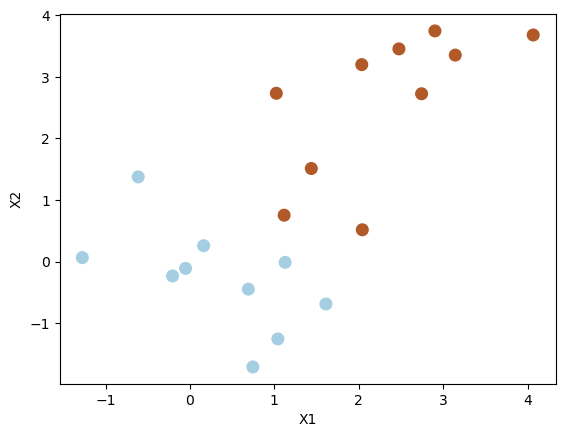

In [2]:
# datos de entrenamiento linealmente separables

np.random.seed(21)
X = np.random.randn(20, 2)
y = np.repeat([-1,1], 10)
X[y==1] = X[y==1] + 2.5

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


Generamos datos de test linealmente separables también.

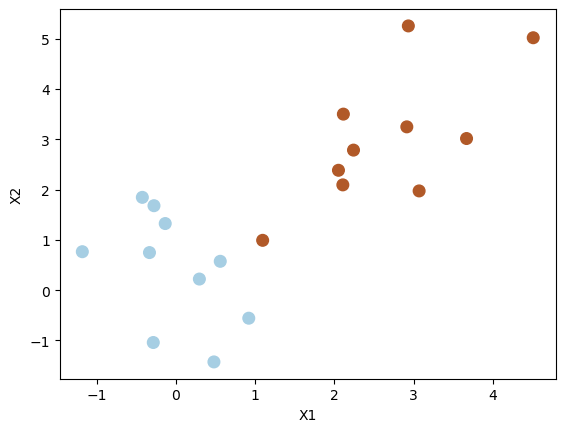

In [3]:
X_test = np.random.randn(20, 2)
y_test = np.repeat([-1,1], 10)
X_test[y_test==1] = X_test[y_test==1] + 2.5

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Ahora intentamos clasificar estas clases con SVC es decir, SVM con un kernel lineal

In [4]:
from sklearn.svm import SVC
import pandas as pd
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, classification_report


# support function to plot the decision boundary of svc and highlight the support vectors
def plot_decision_boundary(svc, X, y, h=0.021, pad=0.21):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # highlight the support vectors
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='*', s=21, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

El parámetro de regularización C establece un compromiso entre el error de entrenamiento y la complejidad del modelo.
* C más pequeño ==> modelo sencillo, mayor error en el entrenamiento, suavidad en la frontera de decisión
* C más grande ==> modelo complejo, poca suavidad de la frontera de decisión, riesgo de sobreajuste

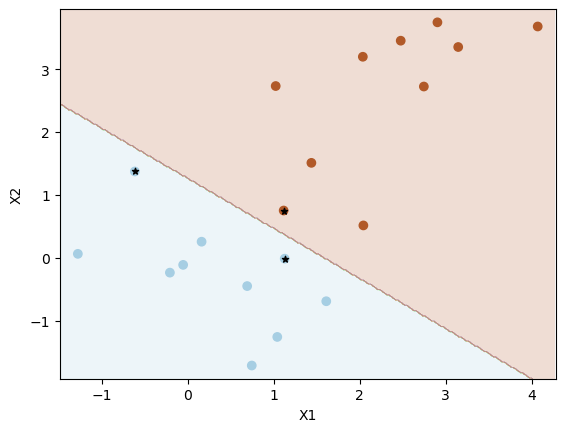

Number of support vectors:  3


In [5]:
svc4 = SVC(C=100, kernel='linear')
svc4.fit(X, y)

plot_decision_boundary(svc4, X, y)

In [6]:
y_pred = svc4.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc4.classes_, columns=svc4.classes_)

-1   1
-1   8   2
 1   0  10

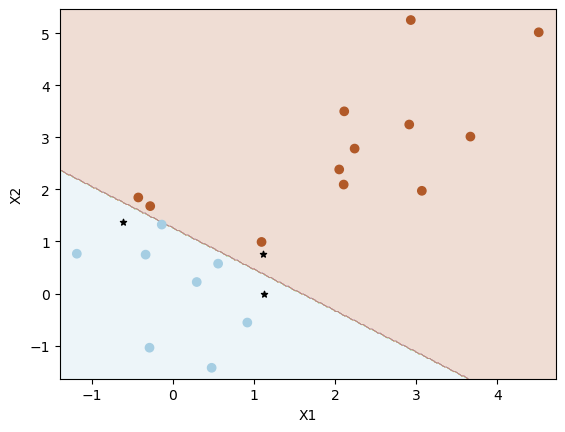

Number of support vectors:  3


In [7]:
plot_decision_boundary(svc4, X_test, y_pred)

**Clasificador con datos no linealmente separables**

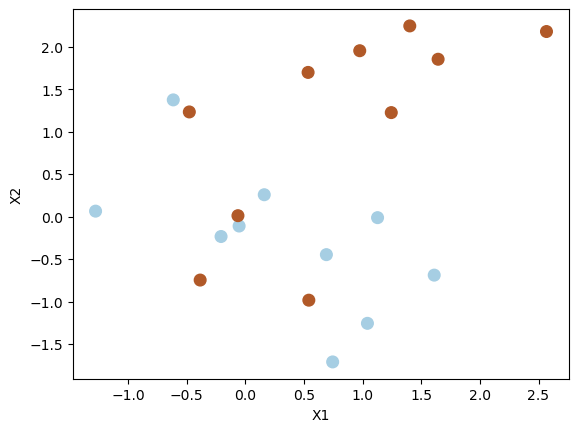

In [8]:
np.random.seed(21)
X = np.random.randn(20, 2)
y = np.repeat([-1,1], 10)
X[y==1] = X[y==1] + 1

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
# Support Vector Classifier
svc1 = SVC(C= 10, kernel='linear')
svc1.fit(X, y)

SVC(C=10, kernel='linear')

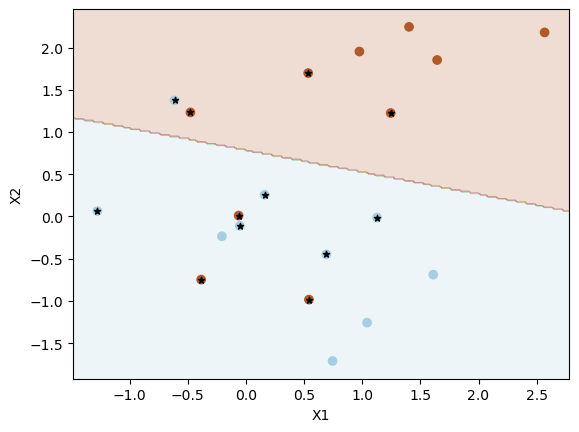

Number of support vectors:  12


In [10]:
plot_decision_boundary(svc1, X, y)


In [11]:
svc1.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

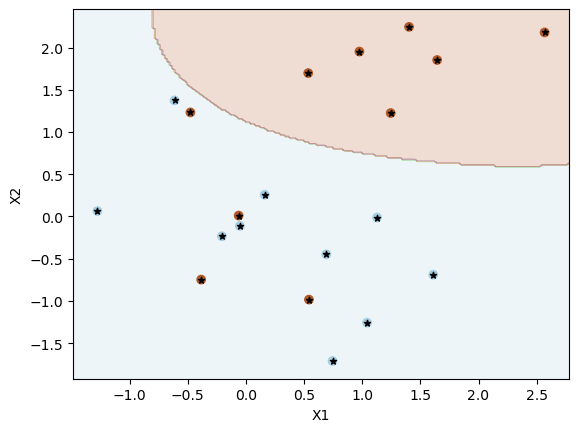

Number of support vectors:  20


In [12]:
svc2 = SVC(C=0.01, kernel='rbf')
svc2.fit(X, y)

plot_decision_boundary(svc2, X, y)

Buscamos los mejores parámetros para el modelo, haciendo uso de la técnica Grid Search (https://scikit-learn.org/stable/modules/grid_search.html#grid-search) que veremos en el Tema 13 de la asignatura de Aprendizaje automático.

_*esta parte es opcional para el ejemplo que estamos haciendo ahora__

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV


tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00120559, 0.00012405, 0.00156226, 0.        , 0.00156817,
        0.00156233, 0.00556068]),
 'std_fit_time': array([0.00097531, 0.00037215, 0.00468678, 0.        , 0.00470452,
        0.004687  , 0.00577068]),
 'mean_score_time': array([0.00080764, 0.        , 0.        , 0.00156245, 0.        ,
        0.        , 0.00059633]),
 'std_score_time': array([0.0008744 , 0.        , 0.        , 0.00468736, 0.        ,
        0.        , 0.00048711]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split2_test_score': array([0.5, 0.5, 0.5, 1. , 1. , 1. , 1. ]),
 'split3_test_score': array([1

In [14]:
clf.best_params_


{'C': 1}

**Creación de datos para test**

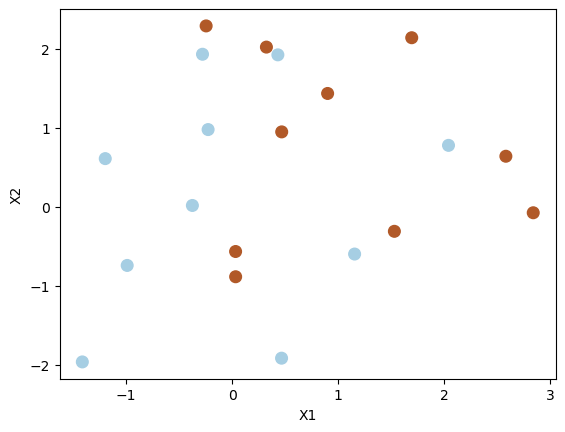

In [15]:
X_test = np.random.randn(20, 2)
y_test = np.repeat([-1,1], 10)
X_test[y_test==1] = X_test[y_test==1] + 1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [16]:
y_pred = svc2.predict(X_test)

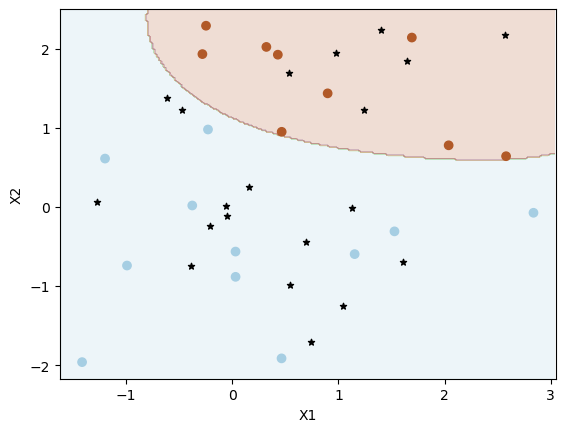

Number of support vectors:  20


In [17]:
plot_decision_boundary(svc2, X_test, y_pred)

In [18]:
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc2.classes_, columns=svc2.classes_)

-1   1
-1   7   3
 1   4   6

In [19]:
svc3 = SVC(C=1, kernel='linear')
svc3.fit(X, y)

y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc3.classes_, columns=svc3.classes_)

-1   1
-1   6   4
 1   4   6

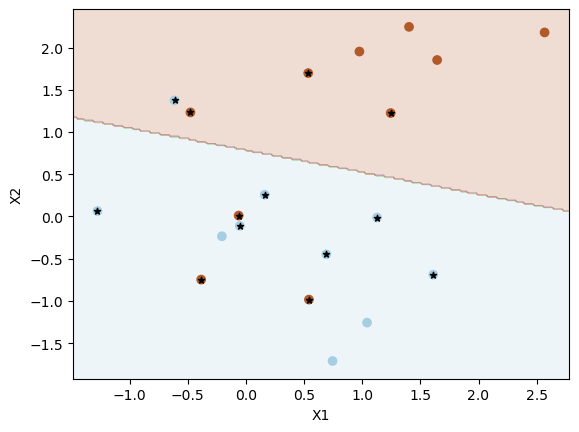

Number of support vectors:  13


In [20]:
plot_decision_boundary(svc3, X, y)